<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [25]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-04-05 12:42:35--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite.1’

survey-results-publ 100%[===================>] 201.62M  68.3MB/s    in 3.0s    

2025-04-05 12:42:40 (68.3 MB/s) - ‘survey-results-public.sqlite.1’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [26]:
!pip install pandas

In [27]:
!pip install matplotlib

In [28]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [29]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [30]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [31]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


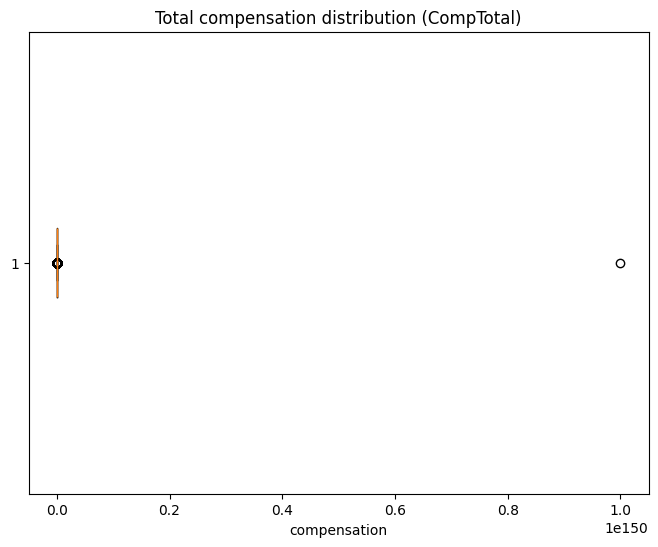

In [33]:
# your code goes here
QUERY="SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL"
df= pd.read_sql_query(QUERY, conn) 
df["CompTotal"]=pd.to_numeric(df["CompTotal"], errors="coerce") 
df.dropna(inplace=True)
plt.figure(figsize=(8, 6))
plt.boxplot(df["CompTotal"], vert=False)
plt.title("Total compensation distribution (CompTotal)")
plt.xlabel("compensation")
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


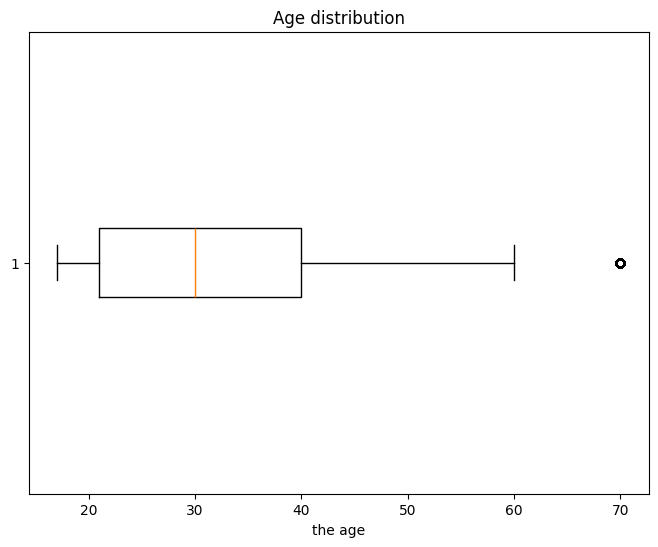

In [34]:
# your code goes here
QUERY="SELECT Age FROM main WHERE Age IS NOT NULL"
df=pd.read_sql_query(QUERY, conn)
age_mapping = {'Under 18 years old':17, '35-44 years old':40, '45-54 years old':50,
 '18-24 years old':21, '25-34 years old':30, '55-64 years old':60, 'Prefer not to say':0,
 '65 years or older':70}
df["Age"]= df["Age"].map(age_mapping)
index_to_drop = df[df["Age"] == 0].index 
df = df.drop(index_to_drop)
plt.figure(figsize=(8, 6))
plt.boxplot(df["Age"], vert=False)
plt.title("Age distribution")
plt.xlabel("the age")
plt.show()


### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


<Figure size 1000x600 with 0 Axes>

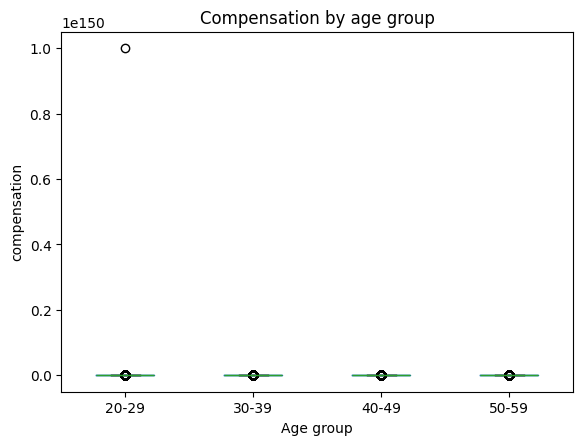

In [36]:
# your code goes here
QUERY="SELECT Age,CompTotal FROM main WHERE CompTotal IS NOT NULL AND Age IS NOT NULL"
df= pd.read_sql_query(QUERY, conn) 
age_mapping = {'Under 18 years old':17, '35-44 years old':40, '45-54 years old':50,
 '18-24 years old':21, '25-34 years old':30, '55-64 years old':60, 'Prefer not to say':0,
 '65 years or older':70}
df["Age"]= df["Age"].map(age_mapping)
index_to_drop = df[df["Age"] == 0].index 
df = df.drop(index_to_drop)
bins = [20, 30, 40, 50, 60]
labels=["20-29", "30-39", "40-49", "50-59"]
df["age_group"] = pd.cut(df["Age"], bins=bins, labels=labels)
plt.figure(figsize=(10, 6))
df.boxplot(column='CompTotal', by='age_group', grid=False)
plt.title('Compensation by age group')
plt.suptitle('')
plt.xlabel('Age group')
plt.ylabel('compensation')
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


<Figure size 1000x600 with 0 Axes>

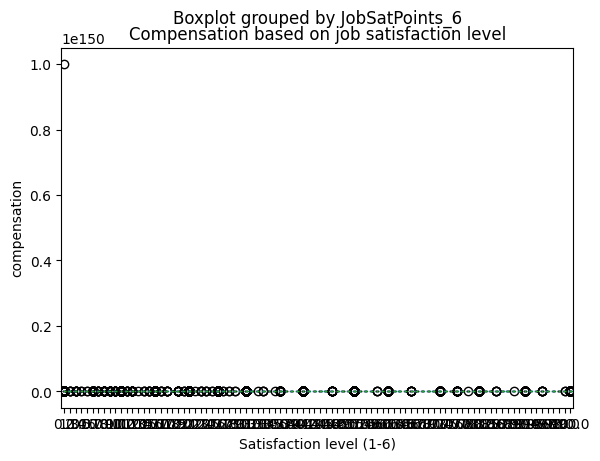

In [44]:
# your code goes here
QUERY="SELECT CompTotal, JobSatPoints_6 FROM main WHERE JobSatPoints_6 IS NOT NULL AND CompTotal IS NOT NULL" 
df=pd.read_sql_query(QUERY, conn)
plt.figure(figsize=(10, 6))
df.boxplot(column='CompTotal', by='JobSatPoints_6', grid=False)
plt.title('Compensation based on job satisfaction level')
plt.xlabel('Satisfaction level (1-6)')
plt.ylabel('compensation')
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


<Figure size 1200x600 with 0 Axes>

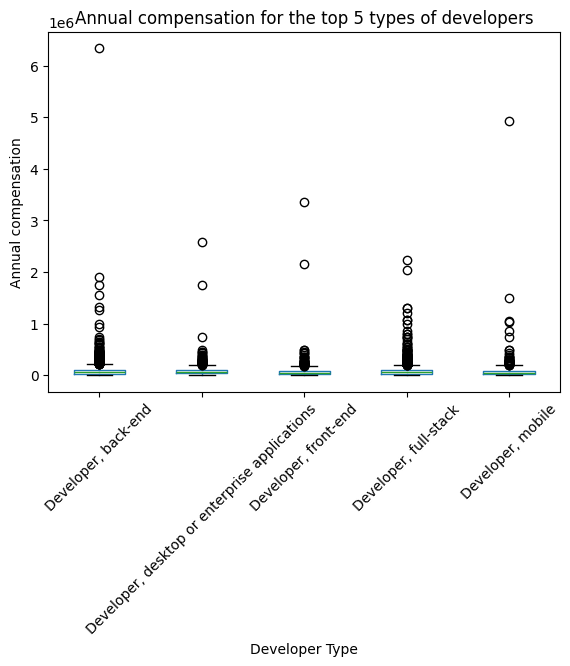

In [45]:
# your code goes here
QUERY = """
SELECT DevType, ConvertedCompYearly 
FROM main 
WHERE DevType IS NOT NULL AND ConvertedCompYearly IS NOT NULL
"""
df_dev = pd.read_sql_query(QUERY, conn)

top_devs = df_dev['DevType'].value_counts().head(5).index
df_top_devs = df_dev[df_dev['DevType'].isin(top_devs)]

plt.figure(figsize=(12, 6))
df_top_devs.boxplot(column='ConvertedCompYearly', by='DevType', grid=False)
plt.title('Annual compensation for the top 5 types of developers')
plt.suptitle('')
plt.xlabel('Developer Type')
plt.ylabel('Annual compensation')
plt.xticks(rotation=45)
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


<Figure size 1200x600 with 0 Axes>

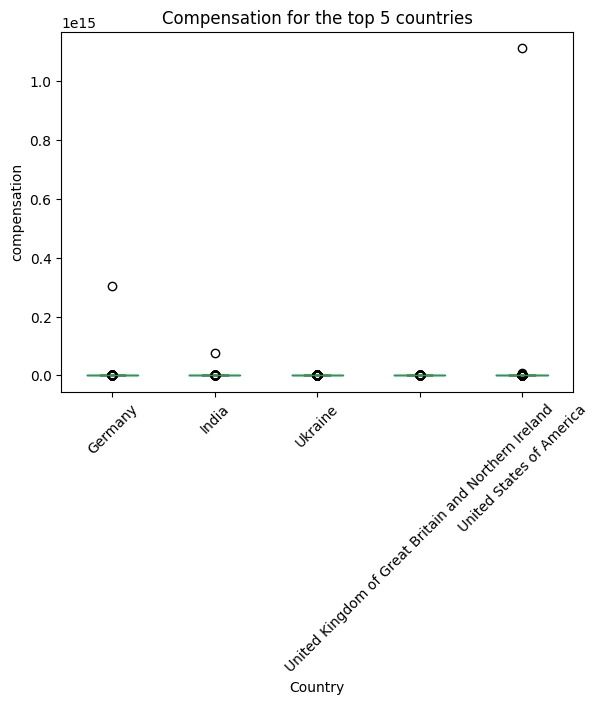

In [50]:
# your code goes here
QUERY="""SELECT Country, CompTotal
FROM main
WHERE CompTotal IS NOT NULL AND Country IS NOT NULL""" 
df = pd.read_sql_query(QUERY, conn)
top_countries = df['Country'].value_counts().head(5).index
df_top_countries = df[df['Country'].isin(top_countries)] 
plt.figure(figsize=(12, 6))
df_top_countries.boxplot(column="CompTotal", by="Country", grid=False)
plt.title('Compensation for the top 5 countries')
plt.suptitle('')
plt.xlabel('Country')
plt.ylabel('compensation')
plt.xticks(rotation=45)
plt.show()



### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


<Figure size 1200x600 with 0 Axes>

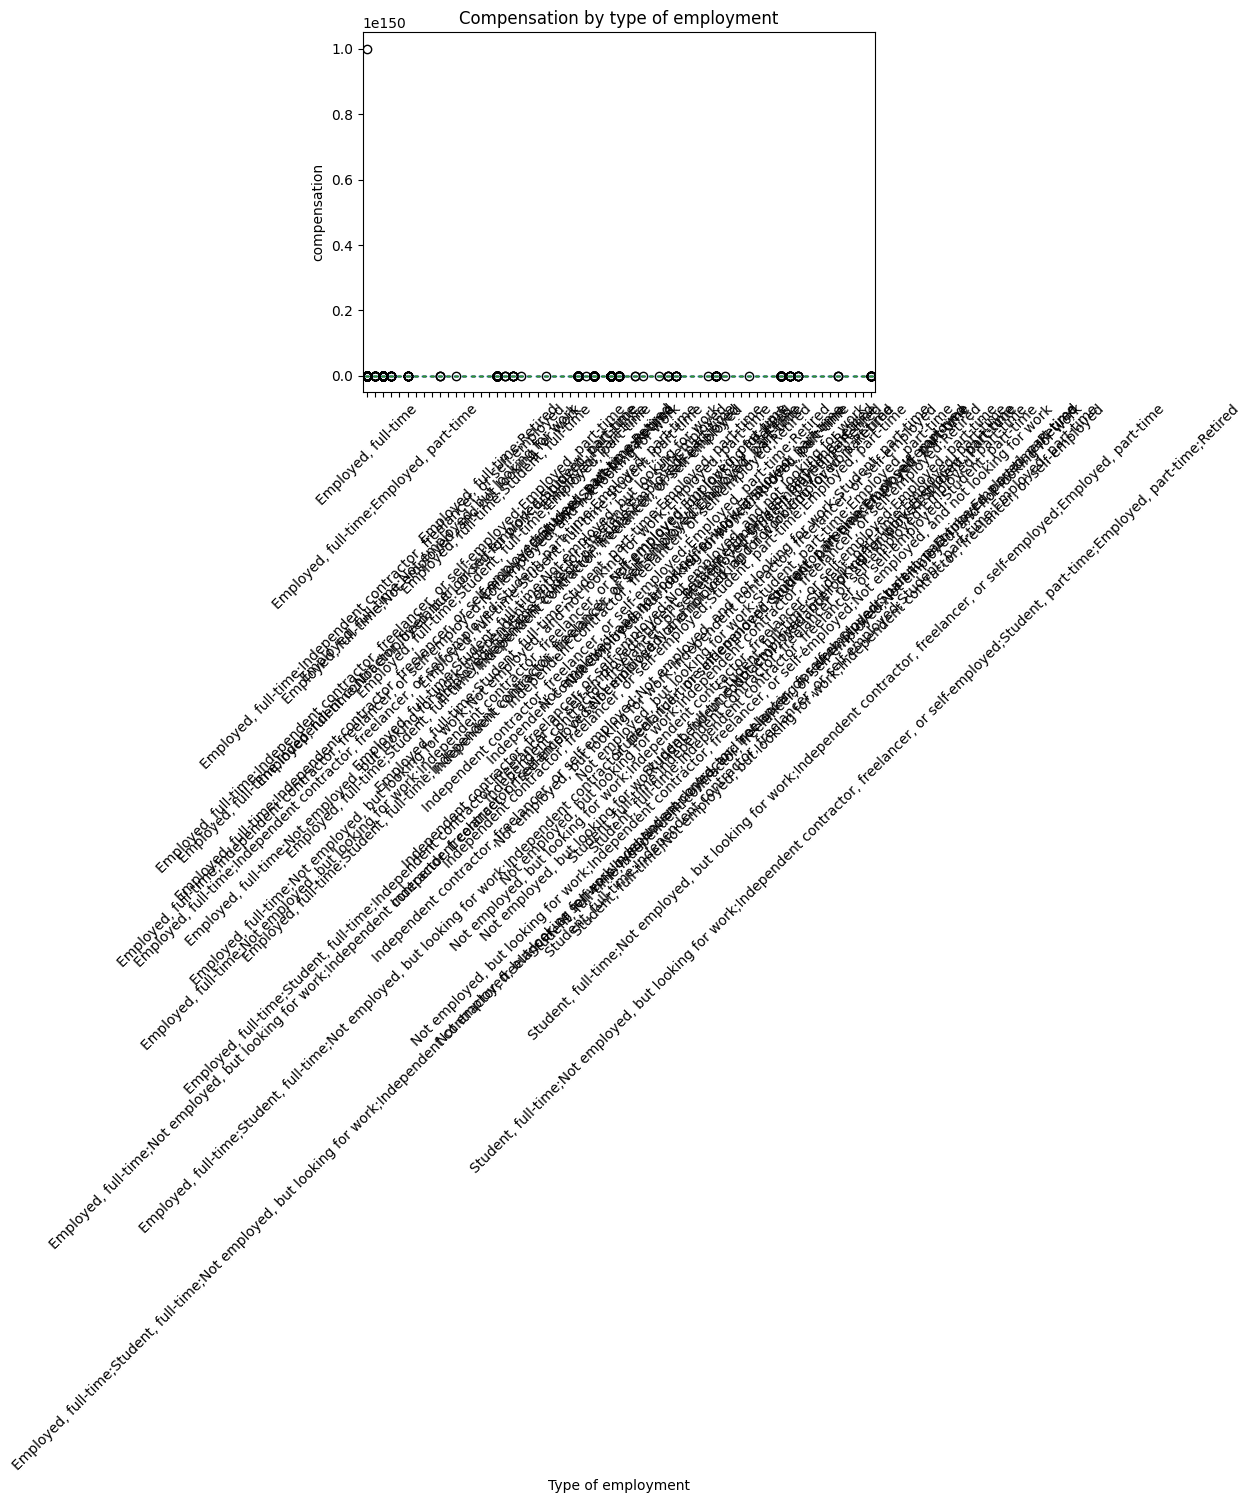

In [51]:
# your code goes here
QUERY = """
SELECT Employment, CompTotal 
FROM main 
WHERE Employment IS NOT NULL AND CompTotal IS NOT NULL
"""
df_employment = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(12, 6))
df_employment.boxplot(column='CompTotal', by='Employment', grid=False)
plt.title('Compensation by type of employment')
plt.suptitle('')
plt.xlabel('Type of employment')
plt.ylabel('compensation')
plt.xticks(rotation=45)
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


<Figure size 1000x600 with 0 Axes>

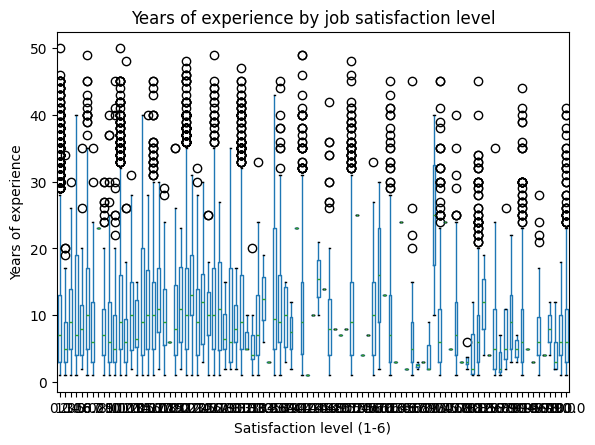

In [52]:
# your code goes here
QUERY = """
SELECT JobSatPoints_6, YearsCodePro 
FROM main 
WHERE JobSatPoints_6 IS NOT NULL AND YearsCodePro IS NOT NULL
"""
df_years_jobsat = pd.read_sql_query(QUERY, conn)

df_years_jobsat['YearsCodePro'] = pd.to_numeric(df_years_jobsat['YearsCodePro'], errors='coerce')
df_years_jobsat.dropna(subset=['YearsCodePro'], inplace=True)

plt.figure(figsize=(10, 6))
df_years_jobsat.boxplot(column='YearsCodePro', by='JobSatPoints_6', grid=False)
plt.title('Years of experience by job satisfaction level')
plt.suptitle('')
plt.xlabel('Satisfaction level (1-6)')
plt.ylabel('Years of experience')
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [53]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
